In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import emoji

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score , classification_report , confusion_matrix
import catboost
from catboost import CatBoostClassifier

In [171]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stephanievalderramacarmona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephanievalderramacarmona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephanievalderramacarmona/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [172]:
#Buenas prácticas, guardamos archivo de texto en una variable
df = pd.read_csv('youtoxic_english_1000.csv')

In [173]:
#Leemos las primeras 5 filas 
df.head(5)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [174]:
#Leemos las últimas 5 filas 
df.tail(5)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [175]:
# formato de los datos
df.dtypes

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [177]:
# Conocer datos nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [178]:
# Datos estadísticos
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [179]:
# Descripción de columnas
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [180]:
#Buscando duplicados
df.duplicated().sum()

0

In [181]:
#imprimiendo correlación de variables
df.corr()

/var/folders/2z/y9k9szx937n84ztg148l8rd00000gn/T/ipykernel_2046/341666574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Datos a la vista

In [182]:
# Establecer el porcentaje de una columna de datos de visualización
def porcentaje_grafico(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

Categoría del comentario:

IsToxic
False    538
True     462
Name: IsToxic, dtype: int64

IsAbusive
False    647
True     353
Name: IsAbusive, dtype: int64

IsThreat
False    979
True      21
Name: IsThreat, dtype: int64

IsProvocative
False    839
True     161
Name: IsProvocative, dtype: int64

IsObscene
False    900
True     100
Name: IsObscene, dtype: int64

IsHatespeech
False    862
True     138
Name: IsHatespeech, dtype: int64

IsRacist
False    875
True     125
Name: IsRacist, dtype: int64

IsNationalist
False    992
True       8
Name: IsNationalist, dtype: int64

IsSexist
False    999
True       1
Name: IsSexist, dtype: int64

IsHomophobic
False    1000
Name: IsHomophobic, dtype: int64

IsReligiousHate
False    988
True      12
Name: IsReligiousHate, dtype: int64

IsRadicalism
False    1000
Name: IsRadicalism, dtype: int64



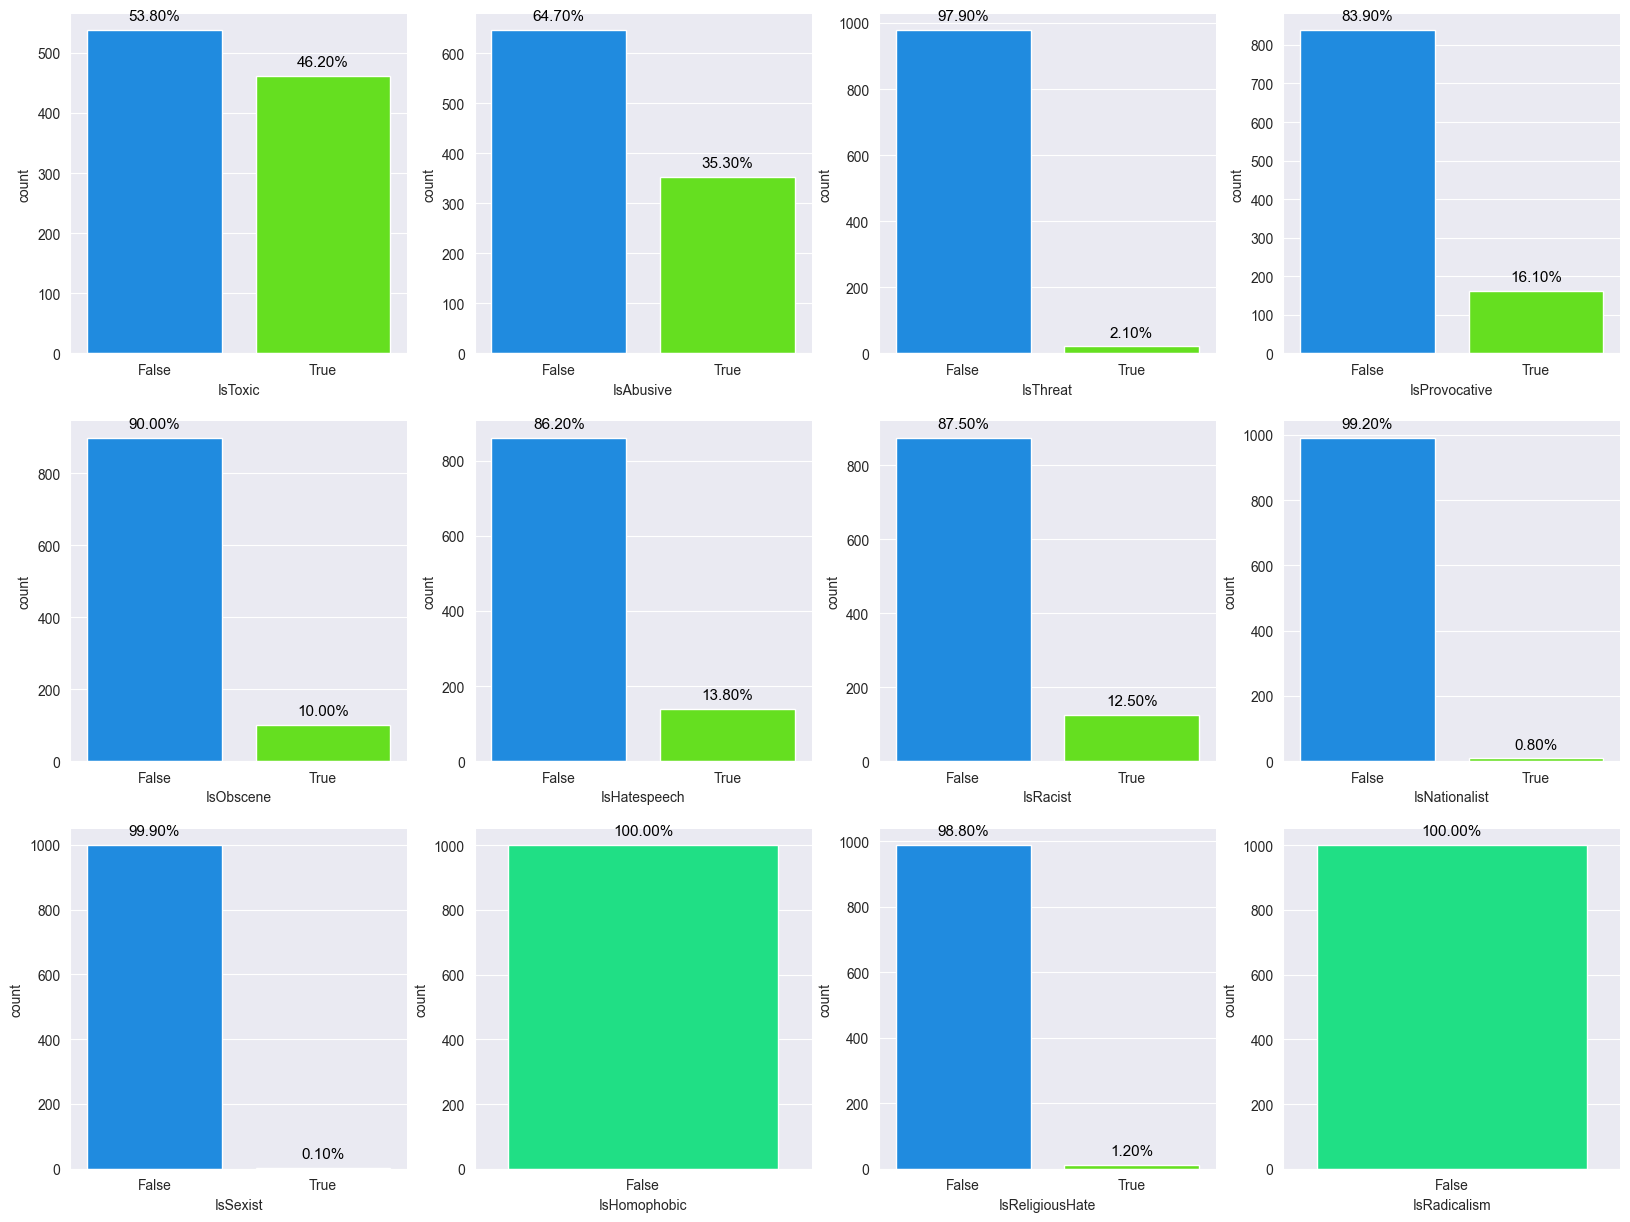

In [183]:
variables_binarias=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism" ]
# Conteo de cada una de las categorías.
print(f"Categoría del comentario:")
print()
for col in variables_binarias:
    print(f"{col}")
    print(df[col].value_counts())
    print()

fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(20,15))
for i,item in enumerate(variables_binarias): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="gist_rainbow_r")
    plt.xlabel(str(item))
    #plt.title("Categorias de Toxicidad "+str(item))
    i=i+1
    porcentaje_grafico(ax)
plt.show()

# Número de comentarios por id del video

In [184]:
#como detectar el id de esos repetidos
df.Text.value_counts()

run them over                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [185]:
#número de comentarios por id
df.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

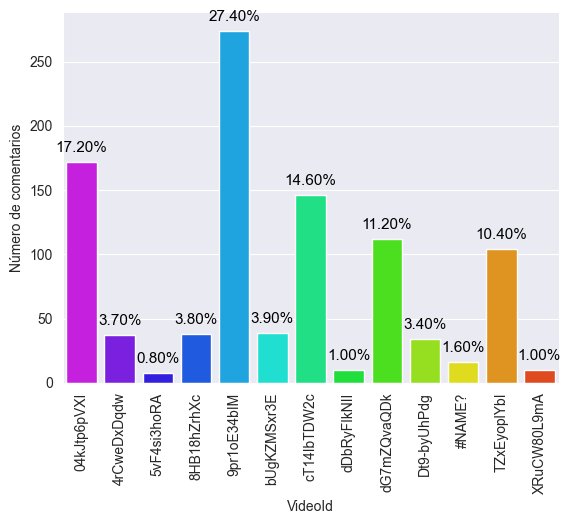

In [186]:
#Resetear el id de Video para que sea mas legible en el grafico
ax = sns.countplot(x="VideoId",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    plt.xticks(rotation=90)
plt.show()

In [187]:
#Limpiando el texto
def clean_text(text):
    # make text lowercase
    text = text.lower()
    # removing text within parentheses
    text = re.sub('', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # getting rid of punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Abreviaturas
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    text = re.sub('S*dS*s*','', text)
    # reemplazar emojis por espacios en blanco
    text = emoji.replace_emoji(text, replace='')
    
    return text

In [188]:
def  abreviaturas(text):
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\W)"," ",text)
    text = re.sub('S*dS*s*','', text)
    return text

In [189]:
def eliminar_emoji(text):
    return emoji.replace_emoji(text, replace='')

In [190]:
clean = lambda x: clean_text(x)

In [191]:
df['clean_text'] = df['Text'].apply(clean)

In [192]:
df.head(5)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,clean_text
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,if only people woul just take a step back an n...
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,law enfocement is not taine to shoot to appehe...
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,ont you eckon them black lives matte bannes b...
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,thee ae a vey lage numbe of people who o not l...
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,the aab ue is absolutely ight he shoul have no...


In [193]:
# Calcular la columna toxico en base a las columnas booleanas
def crear_columna_Toxico(df):
    df_Toxico = []
    """Se crea la columna Toxico, con la condición --> Si alguna de las categorias existentes tiene al menos un True ,
    entonces el valor de la columna Toxico es True ó 1"""
    for row in range(len(df)):
        if df.iloc[row]["IsToxic"] == True or df.iloc[row]["IsAbusive"] == True or df.iloc[row]["IsThreat"] == True or df.iloc[row]["IsProvocative"] == True   or df.iloc[row]["IsObscene"] == True or df.iloc[row]["IsHatespeech"]  == True or df.iloc[row]["IsRacist"] == True    or df.iloc[row]["IsNationalist"] == True or  df.iloc[row]["IsReligiousHate"] == True  or  df.iloc[row]["IsSexist"] == True:
            df_Toxico.append(1)
        else:
            df_Toxico.append(0)
    df["Toxico"] = df_Toxico
    df = df.drop(['IsToxic', 'IsAbusive', 'IsThreat','IsProvocative', 'IsHatespeech', 'IsObscene','IsRacist', 'IsNationalist', 'IsReligiousHate','IsSexist', "CommentId","VideoId",'IsHomophobic', 'IsRadicalism'], axis=1)
    return df

In [194]:
# Se aplica el metodo de crear la Columna Toxico, y se eliminan las otras categorías.
df =crear_columna_Toxico(df)


In [195]:
df.head(12)

,Text,clean_text,Toxico
0,If only people would just take a step back and...,if only people woul just take a step back an n...,0
1,Law enforcement is not trained to shoot to app...,law enfocement is not taine to shoot to appehe...,1
2,\nDont you reckon them 'black lives matter' ba...,ont you eckon them black lives matte bannes b...,1
3,There are a very large number of people who do...,thee ae a vey lage numbe of people who o not l...,0
4,"The Arab dude is absolutely right, he should h...",the aab ue is absolutely ight he shoul have no...,0
5,here people his facebook is https://www.facebo...,hee people his facebook is httpswwwfacebookcom...,1
6,"Check out this you tube post. ""Black man goes ...",check out this you tube post black man goes on...,1
7,I would LOVE to see this pussy go to Staten Is...,i woul love to see this pussy go to staten isl...,1
8,I agree with the protestor.,i agee with the potesto,0
9,mike browns father was made to say that boooshit,mike bowns fathe was mae to say that boooshit,1


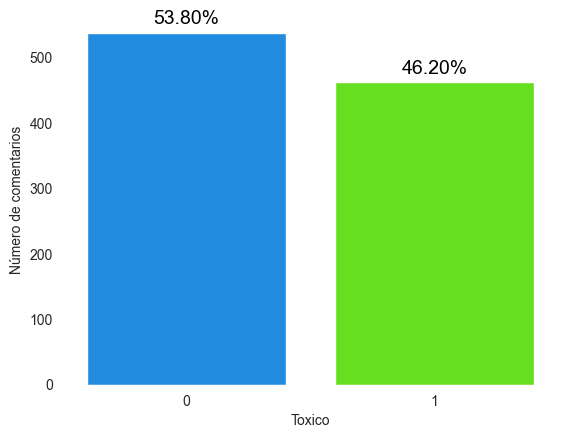

<Figure size 1500x1500 with 0 Axes>

In [196]:
#Visualización de balanceo de datos.
ax = sns.countplot(x="Toxico",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de comentarios")
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=14,color="black",rotation=0,xytext=(0,10),textcoords = "offset points" )
ax.set_facecolor('white')
plt.figure(figsize=(15,15))
plt.show()
#plt.savefig('1.png', dpi=300, transparent=True)

In [27]:
#df['Toxico'] = df['Toxico'].replace('Tóxico', 1)
#df['Toxico'] = df['Toxico'].replace('No Tóxico', 0)

In [197]:
df = df[['clean_text', 'Toxico']].copy()

In [198]:
df.head(5)

,clean_text,Toxico
0,if only people woul just take a step back an n...,0
1,law enfocement is not taine to shoot to appehe...,1
2,ont you eckon them black lives matte bannes b...,1
3,thee ae a vey lage numbe of people who o not l...,0
4,the aab ue is absolutely ight he shoul have no...,0


In [199]:
data = df['clean_text']
target = df['Toxico']

### Comprobando las palabras más frecuentes de versiones limpias y originales de los datos

In [200]:
# Mirando palabras originales
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens

In [201]:
# Aplicando esta función a la columna `clean_text` 
unfiltered_data = list(map(unfiltered_tokens, data))

In [202]:
# Convertir esto en una lista legible y obtener las 20 palabras más frecuentes
flat_unfiltered = [item for sublist in unfiltered_data for item in sublist]
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
dirty_corpus_freqdist.most_common(20)

[('the', 1545),
 ('an', 930),
 ('to', 816),
 ('a', 796),
 ('of', 602),
 ('you', 586),
 ('is', 541),
 ('i', 493),
 ('that', 459),
 ('in', 442),
 ('this', 387),
 ('ae', 325),
 ('it', 287),
 ('he', 265),
 ('o', 265),
 ('was', 261),
 ('they', 261),
 ('people', 256),
 ('fo', 253),
 ('black', 246)]

# Palabras de Parada ---> StopWords

In [203]:
#Preparándonos para aplicar la stopwords
stop_words = set(stopwords.words('english'))

In [204]:
def process_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [207]:
# Aplicando la función anterior a nuestros datos
processed_data = list(map(process_text, data))

In [208]:
# Inicializando nuestro vocabulario
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

4302

In [209]:
# Convertir los datos en una lista legible y obtener las 20 palabras principales
flat_filtered = [item for sublist in processed_data for item in sublist]
clean_corpus_freqdist = FreqDist(flat_filtered)
clean_corpus_freqdist.most_common(20)

[('ae', 325),
 ('people', 256),
 ('fo', 253),
 ('black', 246),
 ('police', 176),
 ('like', 152),
 ('get', 143),
 ('white', 135),
 ('thee', 125),
 ('woul', 120),
 ('thei', 107),
 ('bown', 104),
 ('ont', 102),
 ('office', 101),
 ('shot', 93),
 ('fom', 92),
 ('shoul', 91),
 ('one', 91),
 ('moe', 89),
 ('cop', 87)]

## Lematización

In [219]:
# Creando una lista con todas las salidas lematizadas
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [220]:
X_lem = lemmatized_output
y_lem = target

## Dividir el conjunto de datos en Train-Test y Vectorización

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)

# Usando tf_idf vectorizor con bigramas
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [222]:
tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

# Modelos: SVM, Logistic Regression y Multinomial Naive Bayes

## SVM

In [48]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced', random_state=20)

In [88]:
# Ajustando el conjunto de datos al modelo y prediciendo las etiquetas en el conjunto de datos de validación
SVM.fit(tfidf_data_train2, y_train)
SVM_test_preds = SVM.predict(tfidf_data_test)

In [64]:
# measuring the performance fo the model by several metrics
SVM_precision = precision_score(y_test, SVM_test_preds)
SVM_recall = recall_score(y_test, SVM_test_preds)
SVM_f1_score = f1_score(y_test, SVM_test_preds)
SVM_accuracy = accuracy_score(y_test, SVM_test_preds)
#SVM_accuracy_train = accuracy_score(y_train, SVM_test_preds)
SVM_weighted_f1_score = f1_score(y_test, SVM_test_preds, average='weighted')

In [65]:
# printing evaluation metrics up to 4th decimal place
print('Precision: {:.4}'.format(SVM_precision))
print('Recall: {:.4}'.format(SVM_recall))
print('F1 Score: {:.4}'.format(SVM_f1_score))
print('Accuracy: {:.4}'.format(SVM_accuracy))
#print('Accuracy_train: {:.4}'.format(SVM_accuracy_train))
print('Weighted F1 Score: {:.4}'.format(SVM_weighted_f1_score))

Precision: 0.6796
Recall: 0.7447
F1 Score: 0.7107
Accuracy: 0.715
Weighted F1 Score: 0.7152


In [48]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['SVM'] = {'precision': SVM_precision, 'recall': SVM_recall, 'f1_score': SVM_f1_score, 'accuracy':SVM_accuracy}

## Logistic Regression


In [49]:
logreg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [50]:
logreg_baseline.fit(tfidf_data_train, y_train)
logreg_test_preds = logreg_baseline.predict(tfidf_data_test)

In [51]:
logreg_precision = precision_score(y_test, logreg_test_preds)
logreg_recall = recall_score(y_test, logreg_test_preds)
logreg_f1_score = f1_score(y_test, logreg_test_preds)
logreg_accuracy = accuracy_score(y_test, logreg_test_preds)
logreg_weighted_f1_score = f1_score(y_test, logreg_test_preds, average='weighted')

In [52]:
print('Precision: {:.4}'.format(logreg_precision))
print('Recall: {:.4}'.format(logreg_recall))
print('F1 Score: {:.4}'.format(logreg_f1_score))
print('Accuracy: {:.4}'.format(logreg_accuracy))

Precision: 0.6771
Recall: 0.6915
F1 Score: 0.6842
Accuracy: 0.7


In [53]:
metric_dict['Logistic Regression'] = {'precision': logreg_precision, 'recall': logreg_recall, 'f1_score': logreg_f1_score, 'accuracy': logreg_accuracy}

## Multinomial Naive Bayes

In [54]:
bayes = MultinomialNB(alpha = .01)

In [55]:
bayes.fit(tfidf_data_train, y_train)
bayes_test_preds = bayes.predict(tfidf_data_test)

In [56]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_accuracy = accuracy_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

In [57]:
print('Precision: {:.4}'.format(bayes_precision))
print('Recall: {:.4}'.format(bayes_recall))
print('F1 Score: {:.4}'.format(bayes_f1_score))
print('Accuracy {:.4}'.format(bayes_accuracy))

Precision: 0.6514
Recall: 0.7553
F1 Score: 0.6995
Accuracy 0.695


In [58]:
metric_dict[ 'Naive Bayes'] = {'precision': bayes_precision, 'recall': bayes_recall, 'f1_score': bayes_f1_score, 'accuracy': bayes_accuracy}

## Catboost

In [223]:
from catboost import  Pool
train_pool = Pool(tfidf_data_train, y_train)
eval_pool = Pool(tfidf_data_test, y_test)

In [228]:
model_CBC = CatBoostClassifier( iterations=1000, learning_rate=0.0001)

In [229]:
model_CBC.fit(tfidf_data_train, y_train, eval_set= eval_pool, early_stopping_rounds=10)

0:	learn: 0.6931349	test: 0.6931412	best: 0.6931412 (0)	total: 81.9ms	remaining: 1m 21s
1:	learn: 0.6931258	test: 0.6931389	best: 0.6931389 (1)	total: 145ms	remaining: 1m 12s
2:	learn: 0.6931155	test: 0.6931321	best: 0.6931321 (2)	total: 311ms	remaining: 1m 43s
3:	learn: 0.6931049	test: 0.6931212	best: 0.6931212 (3)	total: 398ms	remaining: 1m 38s
4:	learn: 0.6930963	test: 0.6931149	best: 0.6931149 (4)	total: 522ms	remaining: 1m 43s
5:	learn: 0.6930850	test: 0.6931079	best: 0.6931079 (5)	total: 589ms	remaining: 1m 37s
6:	learn: 0.6930744	test: 0.6931013	best: 0.6931013 (6)	total: 660ms	remaining: 1m 33s
7:	learn: 0.6930651	test: 0.6930946	best: 0.6930946 (7)	total: 761ms	remaining: 1m 34s
8:	learn: 0.6930563	test: 0.6930889	best: 0.6930889 (8)	total: 890ms	remaining: 1m 37s
9:	learn: 0.6930467	test: 0.6930810	best: 0.6930810 (9)	total: 1.05s	remaining: 1m 44s
10:	learn: 0.6930341	test: 0.6930703	best: 0.6930703 (10)	total: 1.15s	remaining: 1m 43s
11:	learn: 0.6930241	test: 0.6930614	bes

In [226]:
#Predicciones del train y del test
predictions = model_CBC.predict(tfidf_data_test)
predictions_train = model_CBC.predict(tfidf_data_train)

#Metricas del modelo
model_CBC_precision = precision_score(y_test, predictions)
model_CBC_recall = recall_score(y_test, predictions)
model_CBC_f1_score = f1_score(y_test, predictions)
model_CBC_accuracy = accuracy_score(y_test, predictions)

#Metricas del train para evaluar overfitting
accuracy_train = accuracy_score(y_train, predictions_train)
precision_train = precision_score(y_train, predictions_train)
recall_train= recall_score(y_train, predictions_train)

print('Precision: {:.4}'.format(model_CBC_precision))
print('Recall: {:.4}'.format(model_CBC_recall))
print('F1 Score: {:.4}'.format(model_CBC_f1_score))
print('Accuracy {:.4}'.format(model_CBC_accuracy))
print("Accuracy Overfitting {:.2f} % ".format(((model_CBC_accuracy - accuracy_train)/model_CBC_accuracy) *100))
print("Precision Overfitting {:.2f} % ".format(((model_CBC_precision - precision_train)/model_CBC_precision) *100))
print("Recall Overfitting {:.2f} % ".format(((model_CBC_recall - recall_train)/model_CBC_recall) *100))
print( " " )

#Reporte de clasificación
print(f"Reporte de Clasificación ")
print(classification_report(predictions,y_test))
print(classification_report(predictions_train,y_train))
print( " " )

Precision: 0.8214
Recall: 0.2447
F1 Score: 0.377
Accuracy 0.62
Accuracy Overfitting -16.53 % 
Precision Overfitting -12.54 % 
Recall Overfitting -76.58 % 
 
Reporte de Clasificación 
              precision    recall  f1-score   support

           0       0.95      0.59      0.73       172
           1       0.24      0.82      0.38        28

    accuracy                           0.62       200
   macro avg       0.60      0.70      0.55       200
weighted avg       0.85      0.62      0.68       200

              precision    recall  f1-score   support

           0       0.97      0.67      0.79       628
           1       0.43      0.92      0.59       172

    accuracy                           0.72       800
   macro avg       0.70      0.80      0.69       800
weighted avg       0.85      0.72      0.75       800

 


Matriz de Confusión


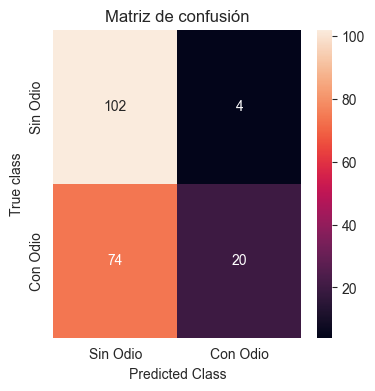

In [163]:
#Matriz de confusión
print( "Matriz de Confusión" )
Labels= 'Sin Odio', 'Con Odio'
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
plt.title("Matriz de confusión")
plt.ylabel('True class')
plt.xlabel('Predicted Class')
plt.show()

# Nube de palabras de los mensajes de odio y no odio

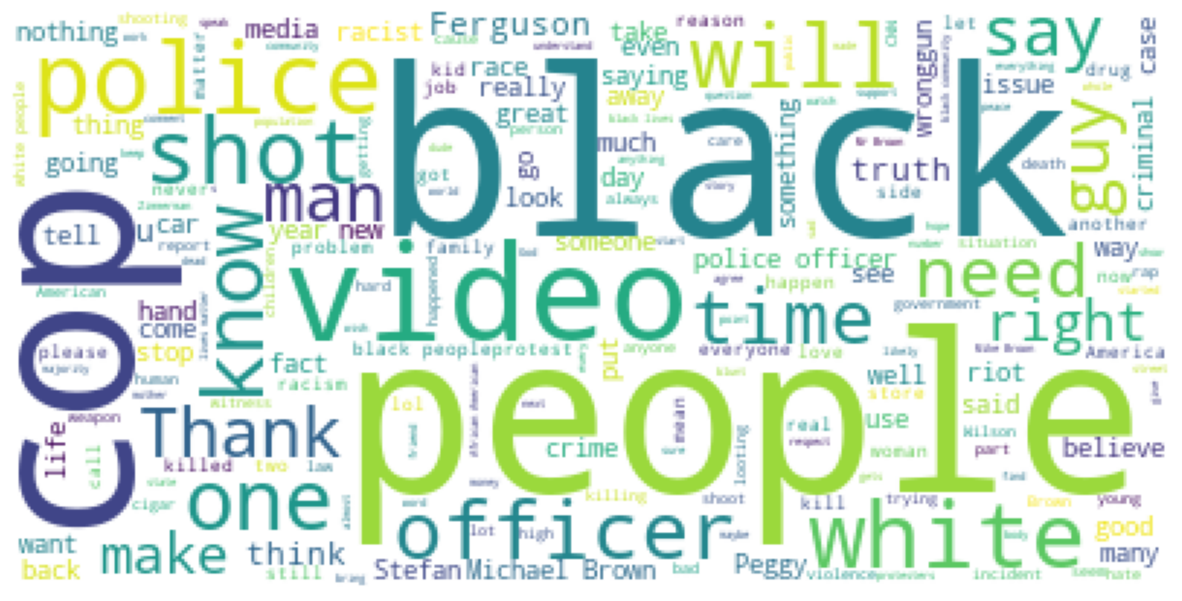

In [132]:
# Comentarios sin odio
no_discurso_odio = df[df.Toxico == 0]
no_discurso_odio_txt = " ".join(comment for comment in no_discurso_odio.Text)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(WordCloud(background_color="white").generate(no_discurso_odio_txt))
#plot_cloud_word(no_discurso_odio_txt)

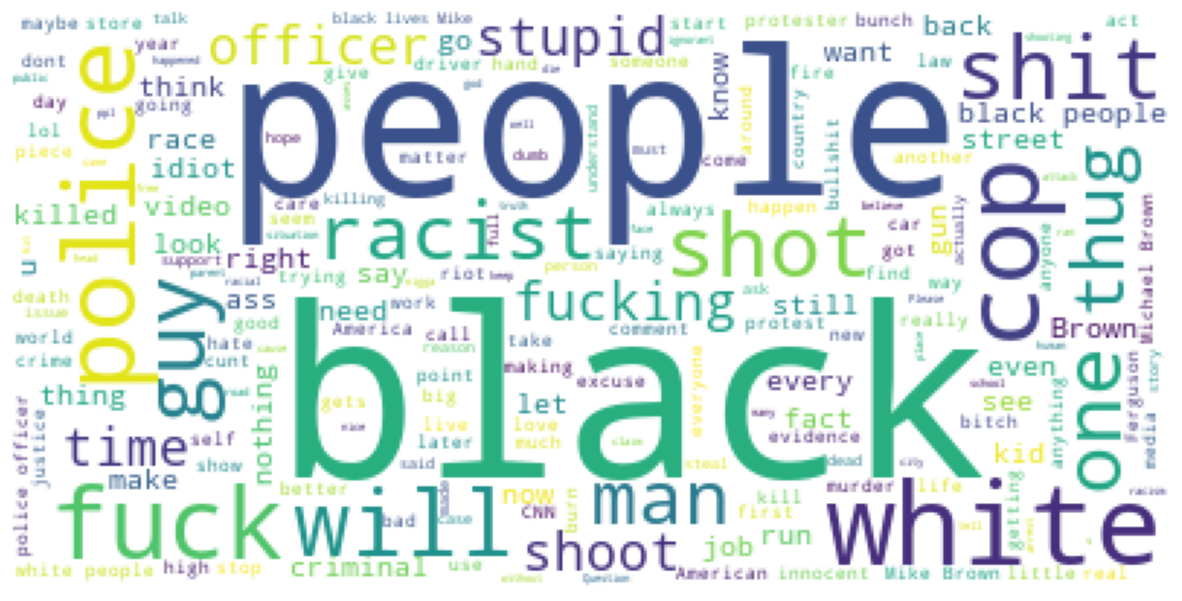

In [133]:
# Comentarios con odio
discurso_odio = df[df.Toxico == 1]
discurso_odio_txt = " ".join(comment for comment in discurso_odio.Text)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(WordCloud(background_color="white").generate(discurso_odio_txt))
#plot_cloud_word(no_discurso_odio_txt)

In [65]:
metric_dict[ 'CatBoost'] = {'precision': model_CBC_precision, 'recall': model_CBC_recall, 'f1_score': model_CBC_f1_score, 'accuracy': model_CBC_accuracy}

## Comparando los resultados

In [66]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,precision,recall,f1_score,accuracy
SVM,0.673077,0.744681,0.707071,0.710
Logistic Regression,0.677083,0.691489,0.684211,0.700
Naive Bayes,0.651376,0.755319,0.699507,0.695
CatBoost,0.754386,0.457447,0.569536,0.675


## Guardamos objetos en pickle

### Se guarda el X_train para su utilización en streamlit

In [70]:
import pickle 
pickle_out = open("X_train_final.pickel", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

In [71]:
#pickle_out = open("final_bayes.pickel", "wb")
#pickle.dump(bayes, pickle_out)
#pickle_out.close()

### Se guarda el modelo CatBoost para su utilización en streamlit

In [72]:
pickle_out = open("final_catboost.pickel", "wb")
pickle.dump(model_CBC, pickle_out)
pickle_out.close()

In [251]:
#Buenas prácticas, guardamos archivo de texto en una variable
palabras = pd.read_csv('words.csv', sep=';')
palabras.head()

,palabras,toxico
0,Javi,1
1,Steph,1
2,Bego,1
3,Alexandra,1
4,YouTube,1


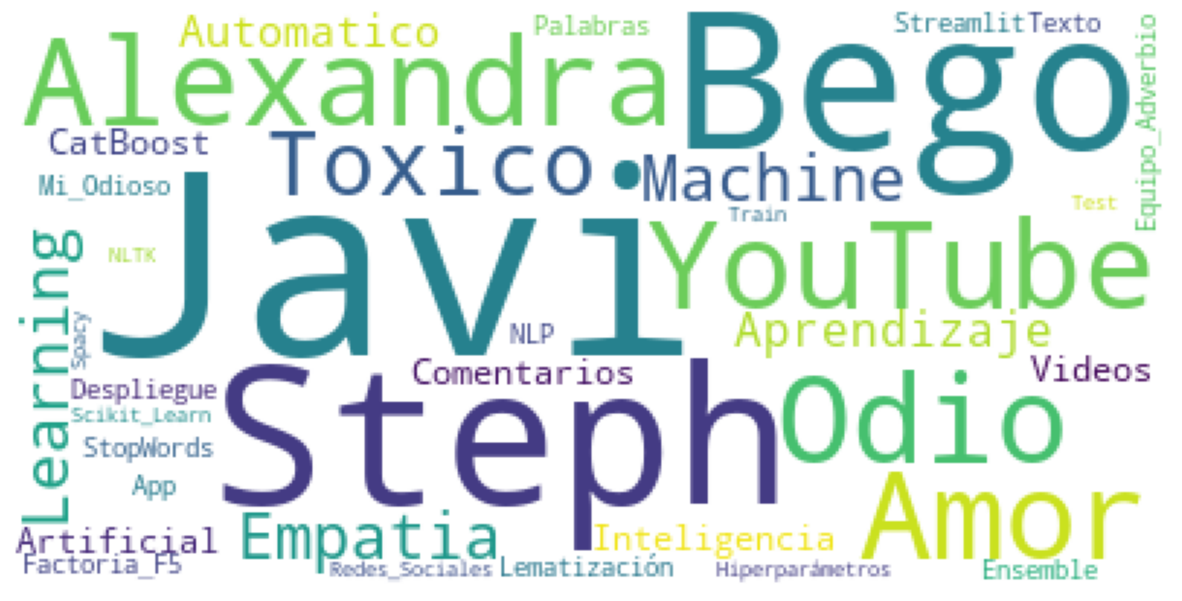

In [255]:
# Comentarios con odio
palabrotas = palabras[palabras.toxico == 1]
palabrotas_txt = " ".join(comment for comment in palabrotas.palabras)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(WordCloud(background_color="white").generate(palabrotas_txt))